In [1]:
import numpy as np
from scipy.stats import norm, chi2, gaussian_kde, t, uniform
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
from statsmodels.stats.stattools import jarque_bera, omni_normtest
import wooldridge
from numba import njit

# 警告メッセージを非表示
import warnings
warnings.filterwarnings("ignore")

In [25]:
n = 10_0000

u = np.zeros(n)

u_sd = 0.5

for i in range(n):  # (1)
    
    prob = 0.05     # (2)
    #引数locに平均、引数scaleに標準偏差を指定
    dist_1 = norm.rvs(loc=0, scale=u_sd, size=1)     # (3)
    dist_2 = (chi2.rvs(1, size=1) - 1) / np.sqrt(2)  # (4)
    
    error = prob*(dist_1)+(1-prob)*(dist_2)          # (5)
    u[i] = error    # (6)

    

'''    
n回forループを宣言。
dist_1の割合
正規分布に従う１つのランダム変数を生成。
カイ二乗分布に従う１つのランダム変数を生成。
errorが誤差項
この誤差項をu[]のi番目に代入。
'''

u.mean()

-0.0034191980646934013

(-2.0, 4.0)

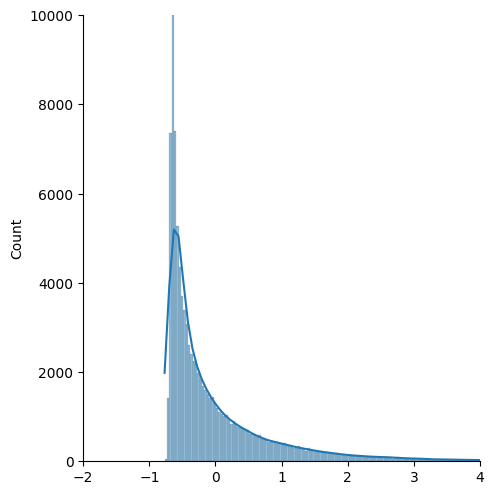

In [24]:
#norm.rvsの練習
import seaborn as sns

# sns.displot(norm.rvs(loc = 0, scale = 10, size = 10000),kind = "hist",kde=True)

sns.displot(u,kind = "hist",kde=True)
plt.ylim(0, 10000)
plt.xlim(-2, 4,.5)



In [26]:
b0 = 1  # 定数項
b1 = 0.5  # 説明変数の係数
N = 10_000


def sim_consistency(n):
    
    b1_arr = np.zeros(N)  # b1の推定値を格納するarray

    for i in range(N):  #  forループで N回シミュレーション
        
        x = np.random.normal(loc=4, scale=0.5, size=n)  # 説明変数
        
        # 残差の生成（上で説明したもの）
        u = np.zeros(n)
        
        for j in range(n):
            prob = 0.05  # 正規分布の確率
            dist_1 = np.random.normal(loc=0, scale=u_sd)
            dist_2 = (np.random.chisquare(1) - 1) / np.sqrt(2)
            error = prob*(dist_1)+(1-prob)*(dist_2)
            u[j] = error
            
        y = b0 + b1 * x + u  # yの抽出
        
        var_cov = np.cov(y,x)  # 分散共分散行列
        cov_yx = var_cov[0,1]  # 共分散
        var_y = var_cov[0,0]  # yの分散
        var_x = var_cov[1,1]  # xの分散        
        b1hat = cov_yx / var_x  # スロープ係数       
        b1_arr[i] = b1hat  # スロープ係数を b1_arrに格納

    return b1_arr   # 推定値のリストを返す

In [28]:
data_consistency = {}  # 空の辞書の作成

for i in [30,100,250,500]:
    data_consistency[str(i)] = sim_consistency(i)

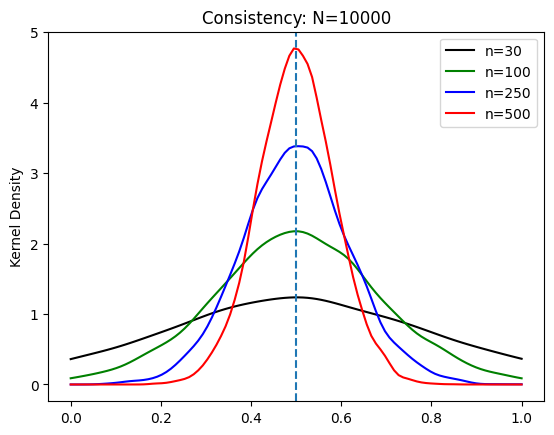

In [31]:
# OLS推定量のリスト
b1hat_list = [data_consistency['30'],data_consistency['100'],data_consistency['250'],data_consistency['500']]

# 色のリスト
color_list = ['k', 'g', 'b', 'r']

# ラベルのリスト
label_list = [30, 100, 250, 500]

#　横軸
xx=np.linspace(0.0,1.0,100)

#　下の説明（１）を参照 
for (b, c, l) in zip(b1hat_list, color_list, label_list):
    kde_model=gaussian_kde(b)
    plt.plot(xx, kde_model(xx), c, label='n={}'.format(l))  # 下の説明（２）

plt.axvline(x=b1,linestyle='dashed')
plt.ylabel('Kernel Density')
plt.title('Consistency: N={}'.format(N))  # 下の説明（２）
plt.legend()
